# Importing Dependencies

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
import seaborn as sns

# Loading the Dataset

In [5]:
df = pd.read_csv("./data/train.csv")

In [6]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
538,539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.shape

(891, 12)

# Pre-preprocessing the data

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df = df.drop(columns=['Cabin'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
df['Embarked'].fillna('S', inplace=True)

In [16]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.000000,0,0,STON/O2. 3101283,7.9250,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,C
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.000000,0,0,231945,11.5000,S
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.000000,0,0,W./C. 14263,10.5000,S
718,719,0,3,"McEvoy, Mr. Michael",male,29.699118,0,0,36568,15.5000,Q
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.000000,0,0,STON/O2. 3101290,7.9250,S
752,753,0,3,"Vande Velde, Mr. Johannes Joseph",male,33.000000,0,0,345780,9.5000,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.000000,0,2,315153,22.0250,S


In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

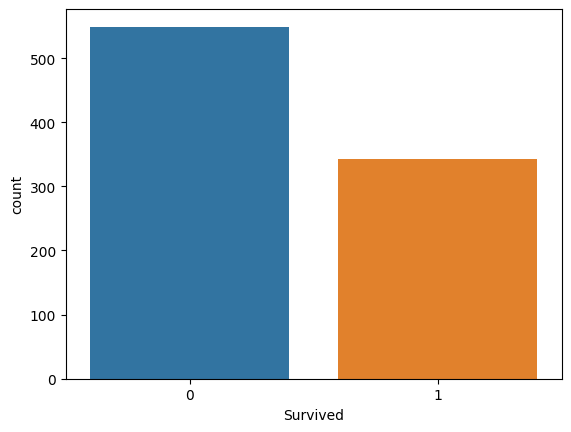

In [20]:
sns.countplot(x=df['Survived'])

In [21]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

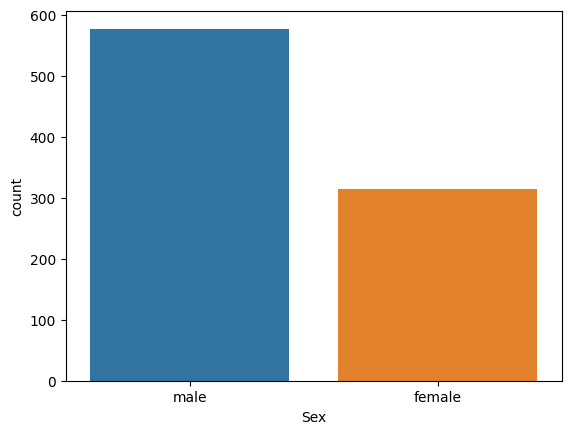

In [22]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

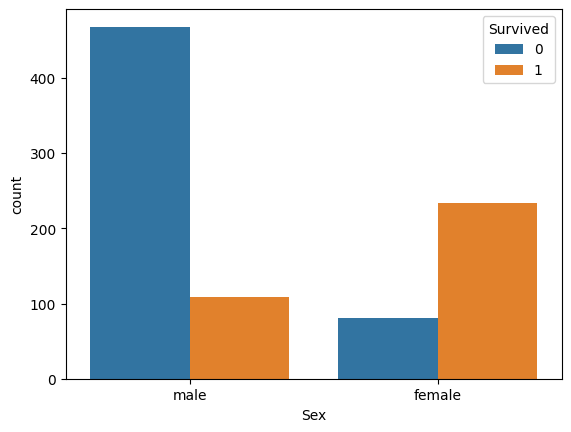

In [23]:
sns.countplot(x='Sex', hue='Survived', data=df)

In [24]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

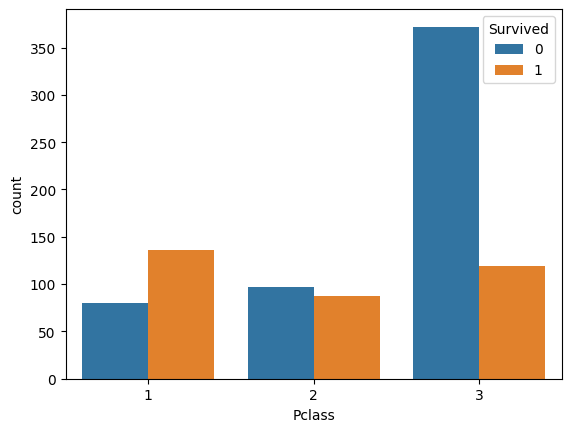

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=df)

<Axes: xlabel='SibSp', ylabel='count'>

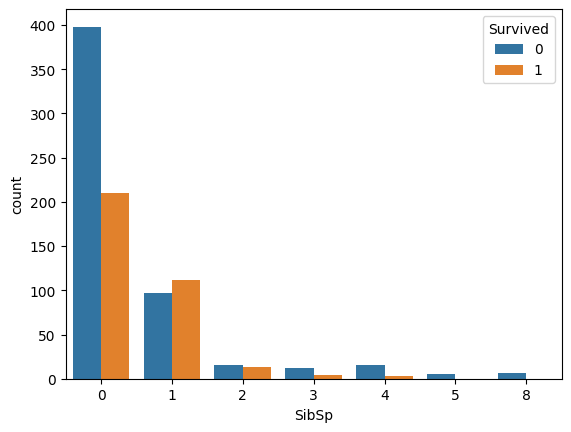

In [26]:
sns.countplot(x='SibSp', hue='Survived', data=df)

Encoding the categorical columns

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [28]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [29]:
df['Sex'] = df['Sex'].map({'male' : 0, 'female' : 1})

In [30]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
df['Embarked'] = df['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [32]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
694,695,0,1,"Weir, Col. John",0,60.0,0,0,113800,26.5500,0
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,0
659,660,0,1,"Newell, Mr. Arthur Webster",0,58.0,0,2,35273,113.2750,1
385,386,0,2,"Davies, Mr. Charles Henry",0,18.0,0,0,S.O.C. 14879,73.5000,0
297,298,0,1,"Allison, Miss. Helen Loraine",1,2.0,1,2,113781,151.5500,0
405,406,0,2,"Gale, Mr. Shadrach",0,34.0,1,0,28664,21.0000,0
569,570,1,3,"Jonsson, Mr. Carl",0,32.0,0,0,350417,7.8542,0
575,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,0
34,35,0,1,"Meyer, Mr. Edgar Joseph",0,28.0,1,0,PC 17604,82.1708,1
458,459,1,2,"Toomey, Miss. Ellen",1,50.0,0,0,F.C.C. 13531,10.5000,0


Seperating features and target column

In [33]:
X = df.drop(columns=['Survived','PassengerId', 'Name', 'Ticket', 'Survived'])
Y = df['Survived']

In [34]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [35]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting the data into training and testing set

In [36]:
xtrain, xtest, ytrain, ytest = tts(X, Y, test_size=0.2, random_state=42)

In [37]:
print(xtrain.shape, ytrain.shape)

(712, 7) (712,)


In [38]:
print(xtest.shape, ytest.shape)

(179, 7) (179,)


In [39]:
model = LogisticRegression()

In [40]:
model.fit(xtrain, ytrain)

c:\Users\Nitro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [41]:
xtrain_prediction = model.predict(xtrain)
xtest_prediction = model.predict(xtest)

In [42]:
training_data_acc = accuracy_score(xtrain_prediction, ytrain)
testing_data_acc = accuracy_score(xtest_prediction, ytest)

In [43]:
print(f"Training data accuracy : {training_data_acc}")
print(f"Testing data accuracy : {testing_data_acc}")

Training data accuracy : 0.8019662921348315
Testing data accuracy : 0.7988826815642458
